In [7]:
import numpy as np

gamma_file_name = 'results_phi_gamma/native_trainSetFiles_phi_pairwise_contact_well-9.5_9.5_0.7_10_gamma_filtered'
phi_file_name = 'results_phi_gamma/phi_pairwise_contact_well_native_Rmodified_decoys_CPLEX_randomization_-9.5_9.5_0.7_10'

# Load gamma data
gamma = np.loadtxt(
    gamma_file_name,
    dtype=complex,
    converters={0: lambda s: complex(s.decode().replace('+-', '-'))}
)

# Determine number of phis in first line
with open(phi_file_name, "r") as file:
    first_line = file.readline()
    total_phis = len(first_line.strip().split())

# Count decoys
num_decoys = sum(1 for _ in open(phi_file_name))

# Initialize phi array
phi_i_decoy = np.zeros((num_decoys, total_phis))

# Load phi data
with open(phi_file_name, "r") as file:
    for i_decoy, line in enumerate(file):
        if i_decoy >= num_decoys:
            break
        values = line.strip().split()
        for i_phi, value in enumerate(values):
            phi_i_decoy[i_decoy][i_phi] = float(value)

# Calculate energy for each decoy
e_decoy = np.zeros(num_decoys)
for i_decoy in range(num_decoys):
    e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])

# Save results
np.savetxt('Energy_mg.txt', e_decoy, fmt='%f', delimiter='\n')
print("Energy calculation complete. Results saved to Energy_mg.txt")

Energy calculation complete. Results saved to Energy_mg.txt


/var/folders/st/gpd8ccyx1zx5sx0n_tbh5ldh0000gn/T/ipykernel_3802/408686931.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])


Manual Correlation Code:




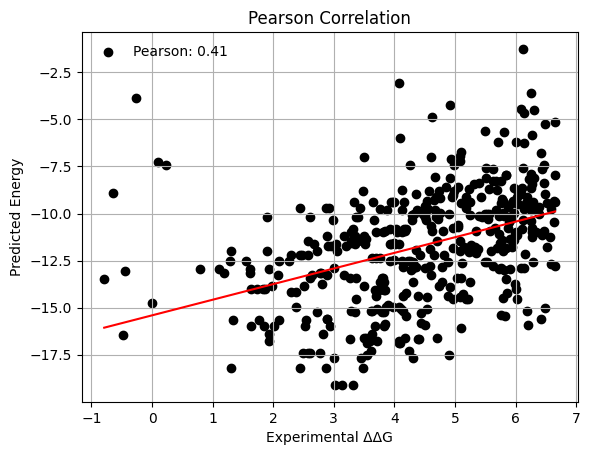

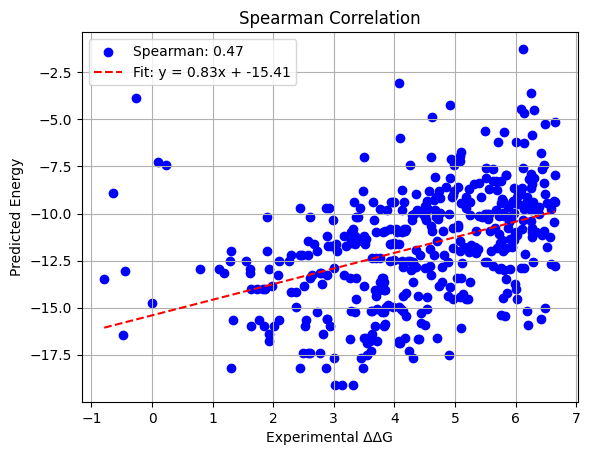

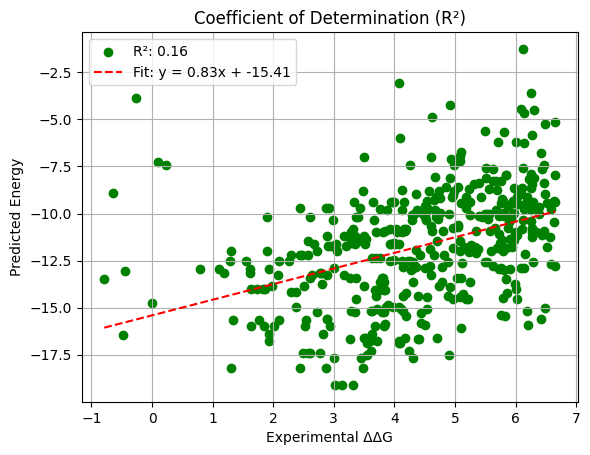

Pearson correlation: 0.406
Spearman correlation: 0.467
R²: 0.165


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load data
experimental_ddg = np.loadtxt('RNAseqDeltaDeltaG.txt')
predicted_energy = np.loadtxt('Energy_mg.txt')

# --- Pearson correlation ---
pearson_corr, _ = pearsonr(experimental_ddg, predicted_energy)
slope, intercept = np.polyfit(experimental_ddg, predicted_energy, 1)
x_vals = np.array([min(experimental_ddg), max(experimental_ddg)])
y_vals = slope * x_vals + intercept

plt.scatter(experimental_ddg, predicted_energy, color='black',
            label=f'Pearson: {pearson_corr:.2f}')
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Experimental ΔΔG')
plt.ylabel('Predicted Energy')
plt.title('Pearson Correlation')
plt.legend(frameon=False, loc='upper left')
plt.grid(True)
plt.show()

# --- Spearman correlation ---
spearman_corr, _ = spearmanr(experimental_ddg, predicted_energy)
slope, intercept = np.polyfit(experimental_ddg, predicted_energy, 1)
y_vals = slope * x_vals + intercept

plt.scatter(experimental_ddg, predicted_energy, color='blue',
            label=f'Spearman: {spearman_corr:.2f}')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Experimental ΔΔG')
plt.ylabel('Predicted Energy')
plt.title('Spearman Correlation')
plt.legend()
plt.grid(True)
plt.show()

# --- R² calculation ---
predicted_fit = slope * experimental_ddg + intercept
ss_res = np.sum((predicted_energy - predicted_fit) ** 2)
ss_tot = np.sum((predicted_energy - np.mean(predicted_energy)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

plt.scatter(experimental_ddg, predicted_energy, color='green',
            label=f'R²: {r_squared:.2f}')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Experimental ΔΔG')
plt.ylabel('Predicted Energy')
plt.title('Coefficient of Determination (R²)')
plt.legend()
plt.grid(True)
plt.show()

# --- Print results ---
print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")
print(f"R²: {r_squared:.3f}")